In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ABCD\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df1 = pd.read_csv("C:/Users/ABCD/Desktop/Saurabh Data Projects/churn-bigml-80.csv")
df2 = pd.read_csv("C:/Users/ABCD/Desktop/Saurabh Data Projects/churn-bigml-20.csv")

In [4]:
df = pd.concat([df1, df2], ignore_index=True)


In [5]:
def check_duplicates(df):
    duplicate_rows = df[df.duplicated()]

    if not duplicate_rows.empty:
        print("Total duplicate rows:", len(duplicate_rows))
        for column in df.columns:
            print(f"Number of duplicates in {column}: {df[column].duplicated().sum()}")
    else:
        print("No duplicates found!")

In [6]:
def draw_categorical_plot(data, figsize=(8, 6), colors=None):
    
    if not isinstance(data, pd.Series):
        raise ValueError("Input data should be a categorical data.")
    
    # Count the occurrences of each category in the data
    counts = data.value_counts()
    
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=figsize)
    
    # If there are less than 6 unique observations, draw a pie chart
    if len(counts) <= 5:
        counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=ax)
        ax.set_title("Pie Chart of " + data.name)
        ax.set_ylabel("")  # This is to remove the column name from the side of the pie chart
    else:
        # Otherwise, draw a bar chart
        sns.barplot(x=counts.index, y=counts.values, palette=colors, ax=ax)
        ax.set_title("Bar Chart of " + data.name)
        ax.set_ylabel("Count")
    
    plt.tight_layout()
    plt.show()  # Display the plot

In [7]:
def plot_data(df, numeric_col, category_col=None):
    plt.figure(figsize=(10, 8))
    
    # Plotting histogram using seaborn
    sns.histplot(data=df, x=numeric_col, kde=True, hue=category_col)
    
    plt.title(f'Distribution of {numeric_col}')
    plt.ylabel('Frequency')
    plt.xlabel(numeric_col)
    plt.show()

In [8]:
# For Numeric data
def draw_numeric_plot(data):
    
    num_unique = data.nunique()
    
    if num_unique == 2:
        # Donut chart
        plt.figure(figsize=(8, 6))
        # Extract the value counts and labels
        counts = data.value_counts()
        labels = counts.index

        # Plot
        wedges, texts, autotexts = plt.pie(counts, labels=labels, wedgeprops=dict(width=0.4), 
                                           autopct='%1.1f%%', startangle=140, pctdistance=0.85)
    
        # Draw center circle for 'donut' style
        centre_circle = plt.Circle((0,0),0.70,fc='white')
        plt.gca().add_artist(centre_circle)

        # Improve text visibility
        for text, autotext in zip(texts, autotexts):
            text.set(size=12)
            autotext.set(size=12)

        plt.title(f"Donut Chart of {data.name}")
        plt.ylabel("")  # Remove automatic label
        plt.legend(loc="best")  # Display a legend
    
    elif 3 <= num_unique <= 50:
        # Bar chart
        plt.figure(figsize=(12, 6))
        data.value_counts().sort_index().plot(kind='bar', color='skyblue')
        plt.title(f"Bar Chart for {data.name}")
        plt.ylabel("Frequency")
        plt.xlabel(data.name)
    
    elif 51 <= num_unique < 90:
        # Simple histogram
        plt.figure(figsize=(12, 6))
        plt.hist(data, bins=30, edgecolor='black', color='skyblue')
        plt.title(f"Histogram of {data.name}")
        plt.ylabel("Frequency")
        plt.xlabel(data.name)
    
    elif num_unique >= 90:
        # Histogram and boxplot
        fig, ax = plt.subplots(1, 2, figsize=(15, 6))
        
        ax[0].hist(data, bins=30, edgecolor='black', color='skyblue')
        ax[0].set_title(f"Histogram of {data.name}")
        ax[0].set_ylabel("Frequency")
        ax[0].set_xlabel(data.name)
        
        ax[1].boxplot(data, vert=False)
        ax[1].set_title(f"Boxplot of {data.name}")
        ax[1].set_yticklabels([data.name])
    
    plt.tight_layout()
    plt.show()

In [9]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
print('Data type for each column::')
print('='*49)
df.info()

Data type for each column::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night 

In [11]:
print('Uniqueness of each column::')
df.nunique()

Uniqueness of each column::


State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [12]:
print('This is the Shape of the data')
print('='*49)
print("The total number of columns: ", df.shape[1])
print("The total number of rows: ", df.shape[0])
print('='*49)

This is the Shape of the data
The total number of columns:  20
The total number of rows:  3333


In [13]:
# Calculate the number of missing values for each feature
missing_values = df.isnull().sum()

# Filter out features without missing values
missing_values = missing_values[missing_values > 0]

# Display missing values
if not missing_values.empty:
    print("Number of missing values for each feature:")
    print(missing_values)
else:
    print("No missing values detected in the dataset!")

No missing values detected in the dataset!


In [14]:
print('Description of the Categorical Dataset:')
df.describe(include=['object', 'bool']).T

Description of the Categorical Dataset:


,count,unique,top,freq
State,3333,51,WV,106
International plan,3333,2,No,3010
Voice mail plan,3333,2,No,2411
Churn,3333,2,False,2850


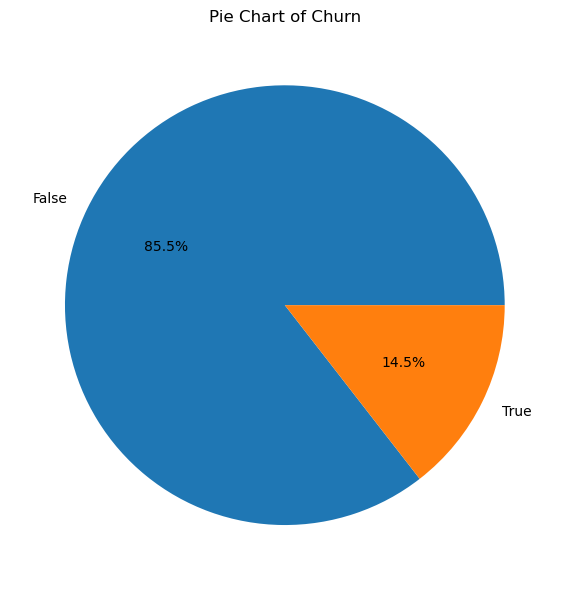

In [15]:
draw_categorical_plot(df['Churn'])

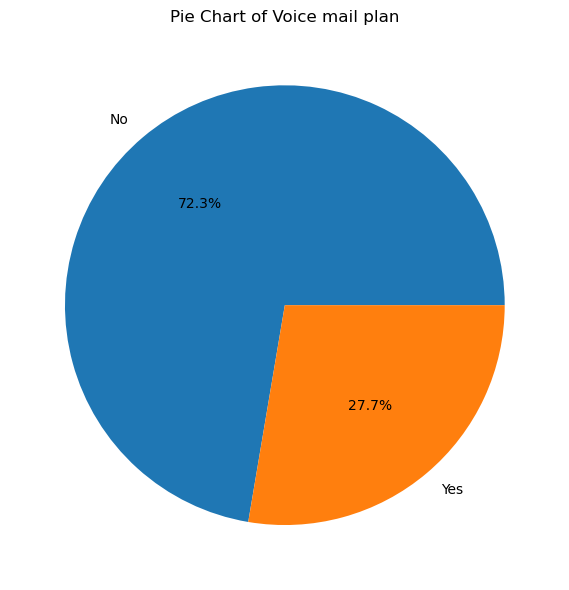

In [16]:
draw_categorical_plot(df['Voice mail plan'])

<AxesSubplot:xlabel='Voice mail plan', ylabel='count'>

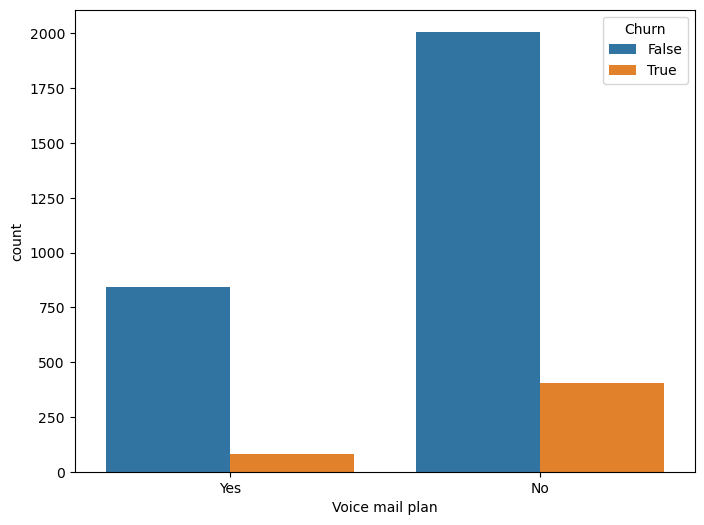

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x = 'Voice mail plan', hue = 'Churn')

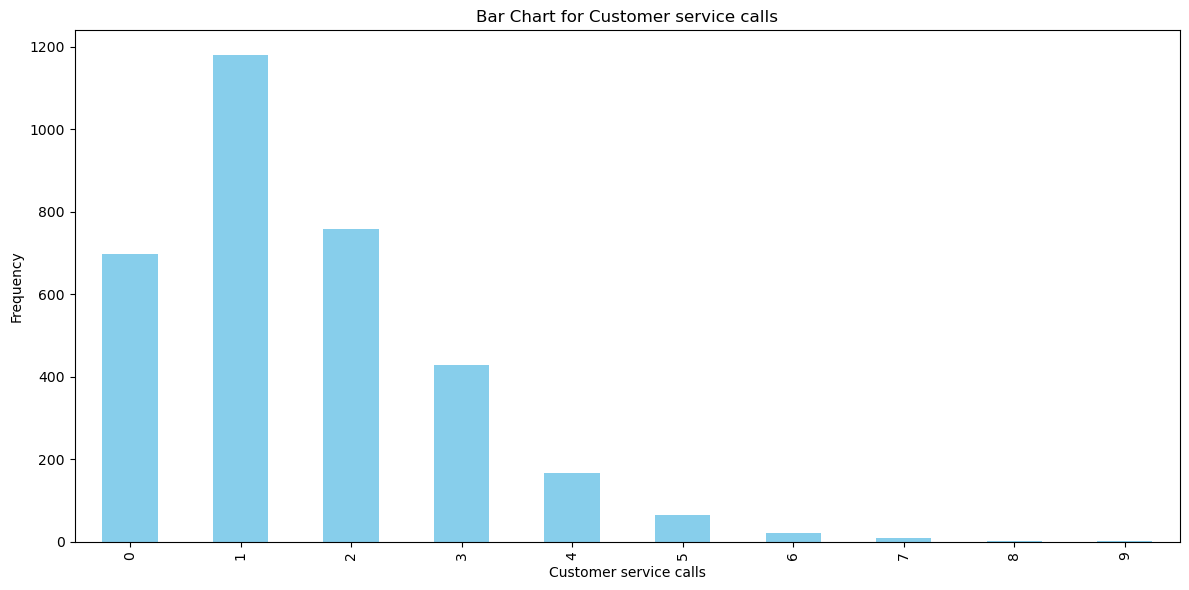

In [18]:
draw_numeric_plot(df['Customer service calls'])

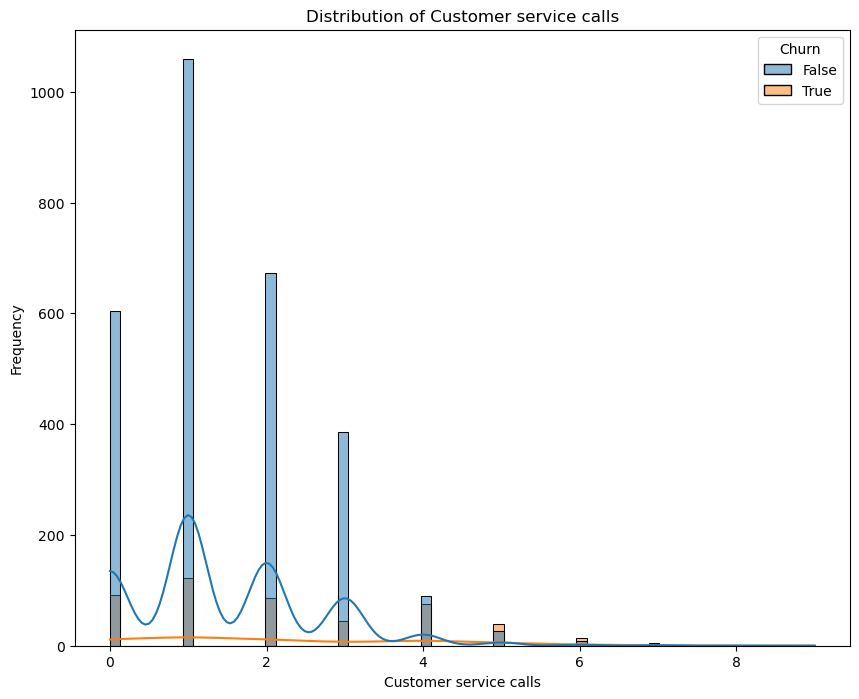

In [19]:
plot_data(df, 'Customer service calls', 'Churn')

In [20]:
df["Account length"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
Account length,1.0,101.064806,101.0,243.0,39.822106,0.096606


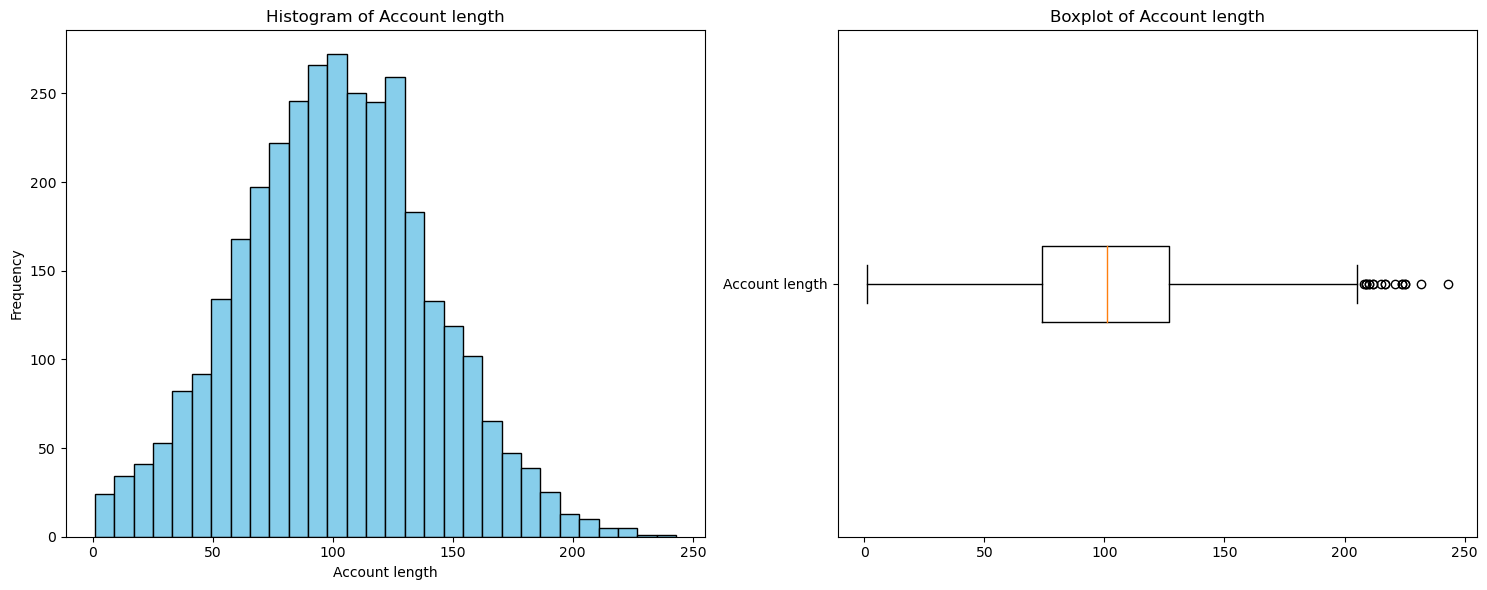

In [21]:
draw_numeric_plot(df['Account length'])

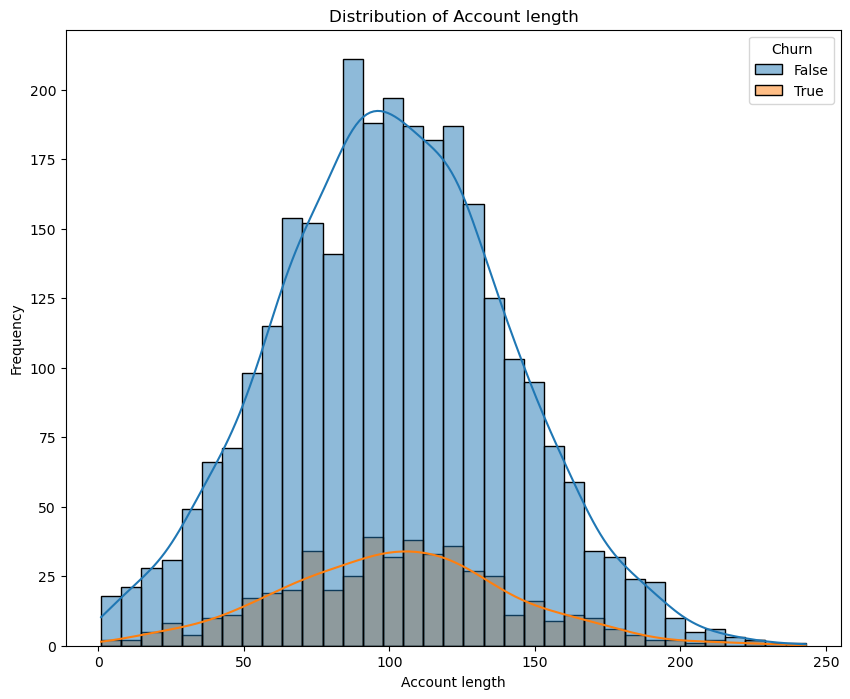

In [22]:
plot_data(df, 'Account length', 'Churn')

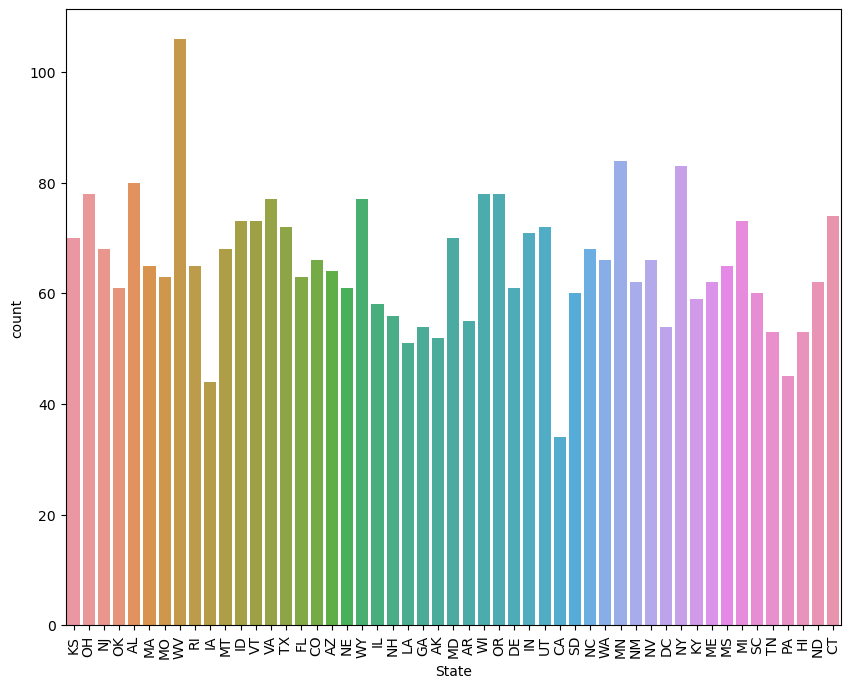

In [23]:
plt.figure(figsize=(10, 8))
sns.countplot(x='State', data=df)
plt.xticks(rotation=90)
plt.show()

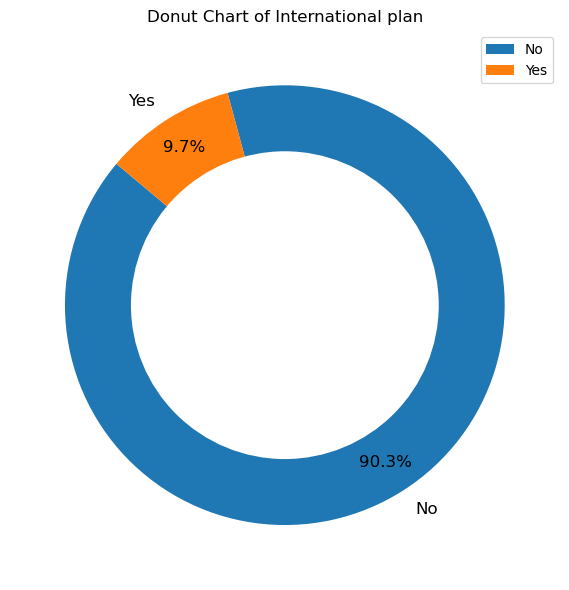

In [24]:
draw_numeric_plot(df['International plan'])

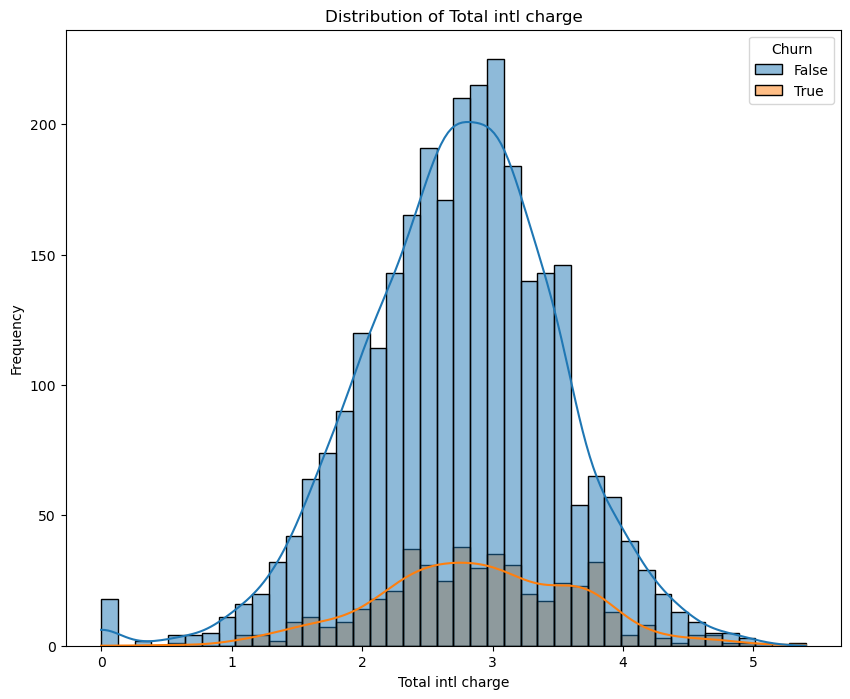

In [25]:
plot_data(df, 'Total intl charge', 'Churn')

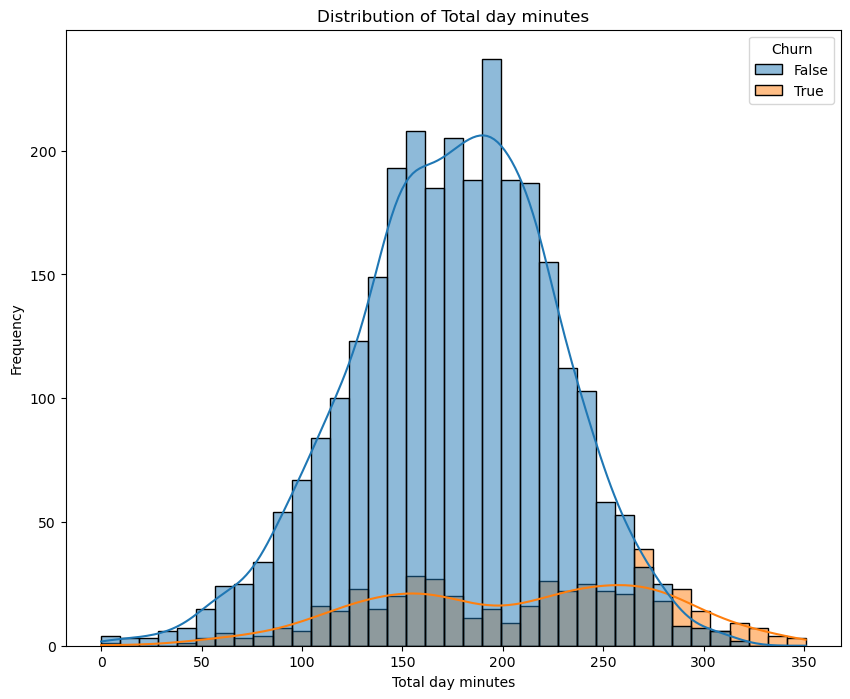

In [26]:
plot_data(df, 'Total day minutes', 'Churn')

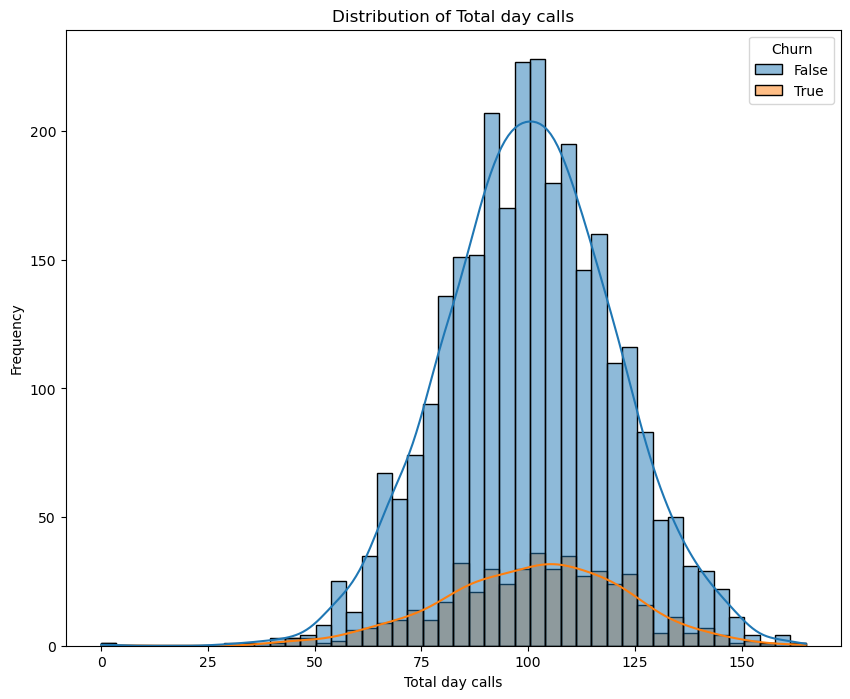

In [27]:
plot_data(df, 'Total day calls', 'Churn')

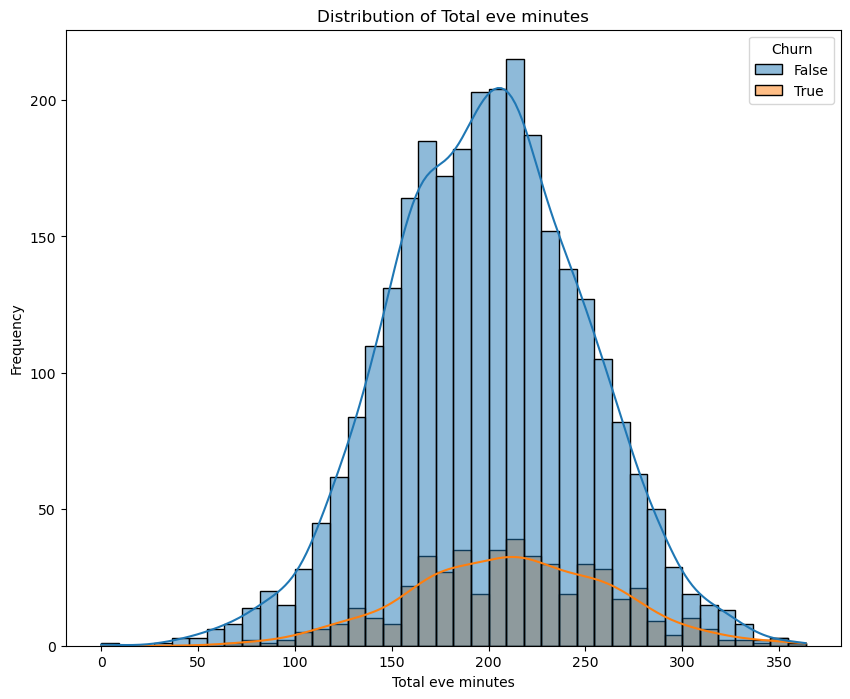

In [28]:
plot_data(df, 'Total eve minutes', 'Churn')

In [29]:
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [31]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Voice mail plan'], df['Churn'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 34.13166001075673
P-value: 5.15063965903898e-09


In [32]:
contingency_table = pd.crosstab(df['International plan'], df['Churn'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 222.5657566499376
P-value: 2.4931077033159556e-50


In [33]:
# Using 'Voice mail plan' as the categorical feature and 'Churn' as the target
contingency_table = pd.crosstab(df['State'], df['Churn'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 83.04379191019663
P-value: 0.002296221552011188


In [34]:
# Calculate Q1, Q3, and IQR for each numeric column in df
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

# Align DataFrame and Series for comparison
df_aligned, IQR_low_aligned = df.align(Q1 - 1.5 * IQR, axis=1)
_, IQR_high_aligned = df.align(Q3 + 1.5 * IQR, axis=1)

# Apply the IQR formula. This will return a DataFrame with boolean values indicating whether each value is an outlier
outliers_df = ((df_aligned < IQR_low_aligned) | (df_aligned > IQR_high_aligned))

# Check if any row contains at least one outlier
outliers = outliers_df.any(axis=1)

In [35]:
print(f"Number of rows containing outliers: {sum(outliers)}")

Number of rows containing outliers: 529


In [36]:
df.replace(["No", "Yes"], [0, 1], inplace=True)
df.replace([False, True], [0, 1], inplace=True)

In [37]:
# Create a mapping dictionary
area_code_mapping = {
    415: 2,
    510: 1,
    408: 0
}

# Use the replace method to replace the values
df['Area code'] = df['Area code'].replace(area_code_mapping)

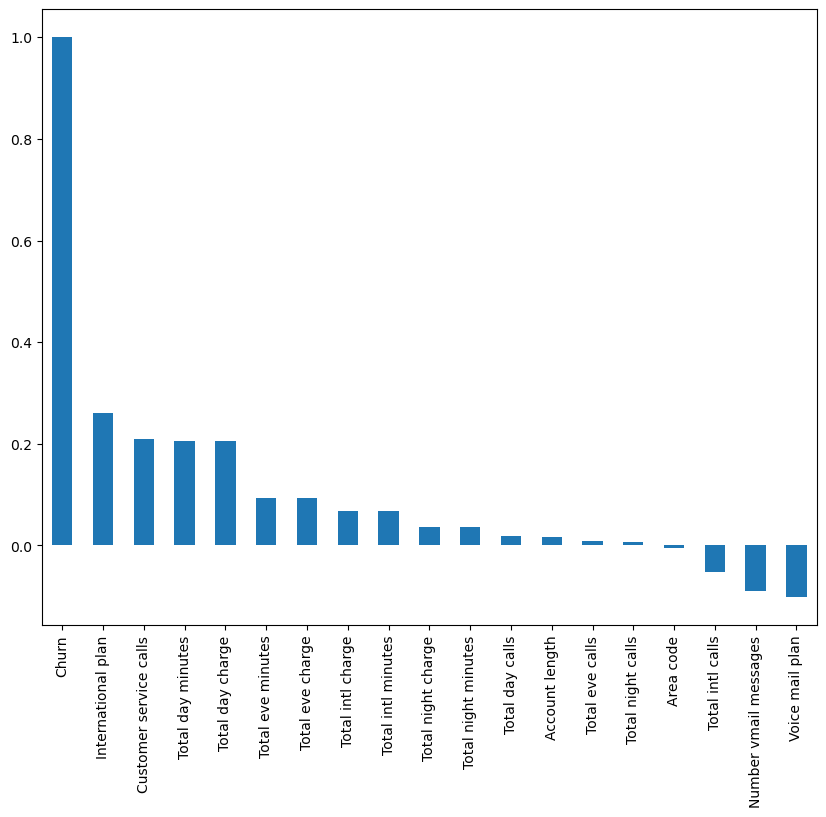

In [38]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation
target_corr = numeric_df.corr()['Churn'].sort_values(ascending=False)

# Plot the correlation
plt.figure(figsize=(10, 8))
target_corr.plot(kind='bar')
plt.show()

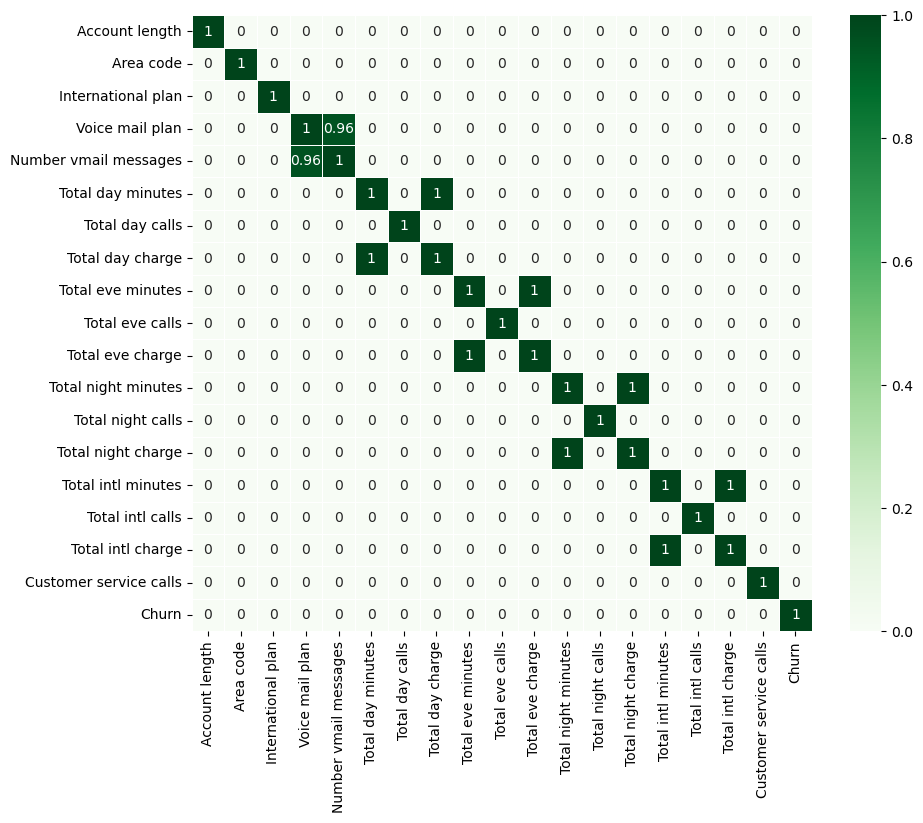

In [41]:
# Compute the correlation
corr = numeric_df.corr()

# Filter for high correlations
high_corr = corr[abs(corr) > 0.5].fillna(0)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr, cmap='Greens', annot=True, linewidths=.5)
plt.show()

In [42]:
to_drop = ['State', 'Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']

In [43]:
df.drop(to_drop, axis = 1, inplace = True)

In [44]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,2,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,107,2,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,137,2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,84,0,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,75,2,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


In [47]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)   # Features
y = df['Churn']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42, stratify=y)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

C:\Users\ABCD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.853
Random Forest Accuracy: 0.948
Decision Tree Accuracy: 0.916
Gradient Boosting Accuracy: 0.947
The best model is Random Forest with an accuracy of 0.95


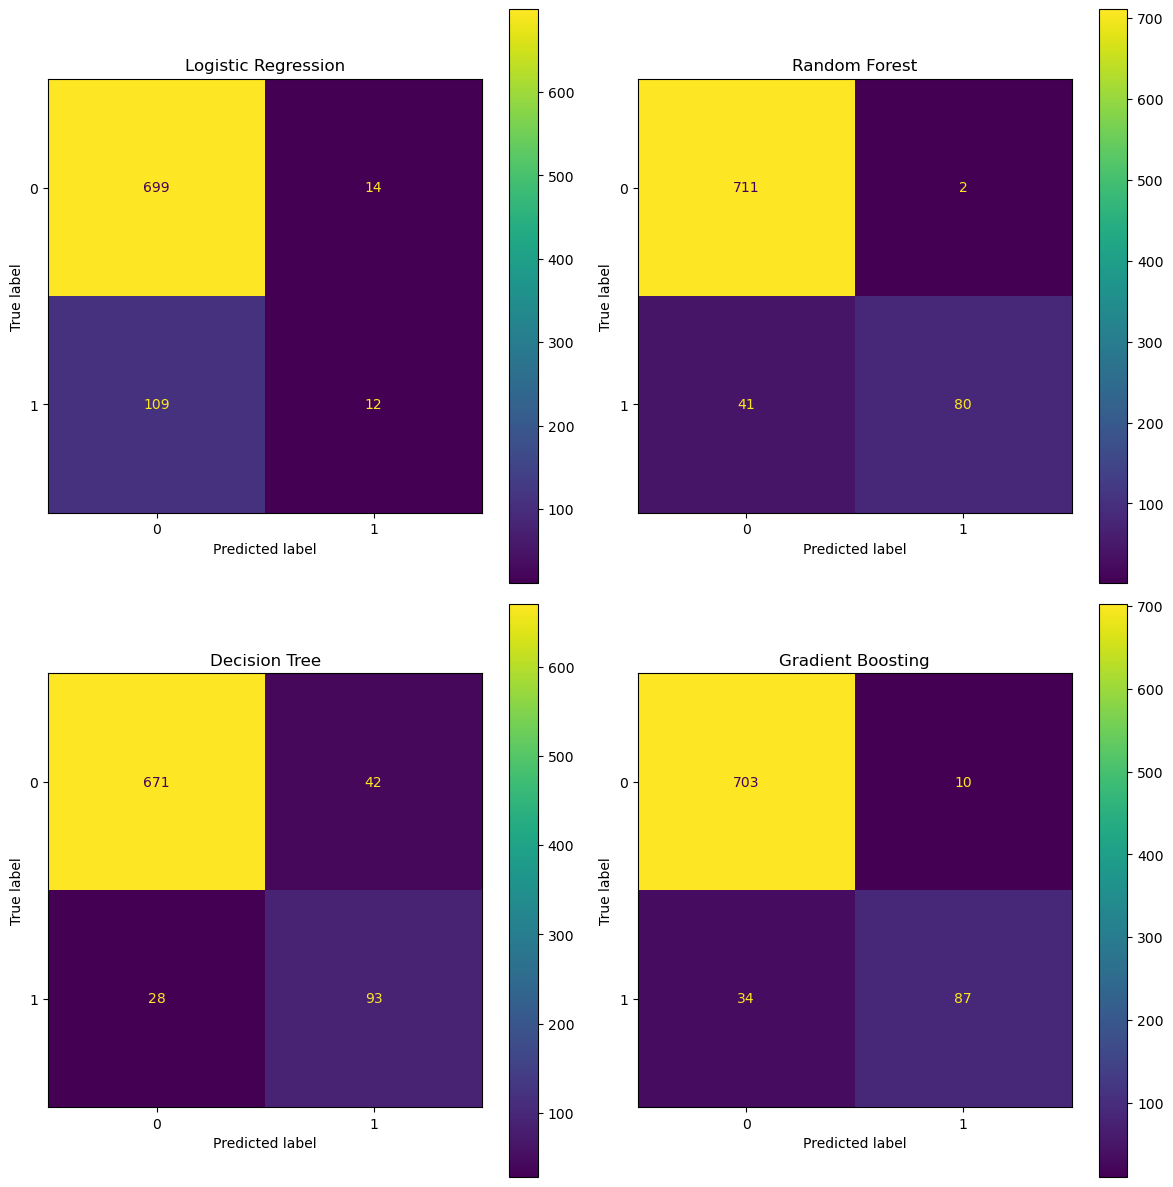

In [51]:
# Train the models
logreg_model = LogisticRegression().fit(X_train, y_train)
rf_model = RandomForestClassifier().fit(X_train, y_train)
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
gb_model = GradientBoostingClassifier().fit(X_train, y_train)

# Predict using the models
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Generate classification reports
logreg_report = classification_report(y_test, logreg_predictions, output_dict=True)
rf_report = classification_report(y_test, rf_predictions, output_dict=True)
dt_report = classification_report(y_test, dt_predictions, output_dict=True)
gb_report = classification_report(y_test, gb_predictions, output_dict=True)

# Calculate accuracies
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)

# Determine the best model based on accuracy
accuracies = {
    'Logistic Regression': logreg_accuracy,
    'Random Forest': rf_accuracy,
    'Decision Tree': dt_accuracy,
    'Gradient Boosting': gb_accuracy
}

# Determine the best model based on accuracy
best_model_name = max(accuracies, key=accuracies.get)

# Create the result_df DataFrame for the best model
if best_model_name == 'Logistic Regression':
    best_model_predictions = logreg_predictions
elif best_model_name == 'Random Forest':
    best_model_predictions = rf_predictions
elif best_model_name == 'Decision Tree':
    best_model_predictions = dt_predictions
elif best_model_name == 'Gradient Boosting':
    best_model_predictions = gb_predictions

result_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': best_model_predictions
})

# Print the accuracy of each model
print(f"Logistic Regression Accuracy: {logreg_accuracy:.3f}")
print(f"Random Forest Accuracy: {rf_accuracy:.3f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.3f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.3f}")

# Print the best model's name and accuracy
print(f"The best model is {best_model_name} with an accuracy of {accuracies[best_model_name]:.2f}")

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

models = {
    'Logistic Regression': logreg_predictions,
    'Random Forest': rf_predictions,
    'Decision Tree': dt_predictions,
    'Gradient Boosting': gb_predictions
}

for ax, (model_name, predictions) in zip(axes.flatten(), models.items()):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax)
    ax.set_title(model_name)

plt.tight_layout()
plt.show()

In [52]:
def extract_metrics(report):
    """Extracts the desired metrics from the classification report."""
    return {
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    }

# List of models and their reports
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']
reports = [logreg_report, rf_report, dt_report, gb_report]

# Populate metrics data using list comprehensions
metrics_data = {
    'Model': models,
    'Accuracy': [extract_metrics(report)['Accuracy'] for report in reports],
    'Precision': [extract_metrics(report)['Precision'] for report in reports],
    'Recall': [extract_metrics(report)['Recall'] for report in reports],
    'F1-score': [extract_metrics(report)['F1-score'] for report in reports]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics_data)

In [53]:

def color_cells(val):
    if val == metrics_df['F1-score'].max():
        color = 'green'
    elif val == metrics_df['F1-score'].min():
        color = 'orange'
    else:
        color = 'black'
    return f'color: {color}'

colored_df = metrics_df.style.applymap(color_cells, subset=['F1-score'])
colored_df

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.852518,0.806549,0.852518,0.809468
1,Random Forest,0.948441,0.949850,0.948441,0.944175
2,Decision Tree,0.916067,0.920617,0.916067,0.917946
3,Gradient Boosting,0.947242,0.945603,0.947242,0.944775


In [ ]:
"""
In wrapping up our data-driven odyssey into customer churn, it's a fitting moment to reflect on our findings and envisage the road ahead.

Recap and Major Takeaways:

Star Performer: Random Forest not only outperformed its counterparts but did so with flair, registering an F1 score of 0.9516. It's commendable average F1 score of 0.8219, under the scrutiny of StratifiedKFold cross-validation, is testament to its consistency and resilience.

The Crux of Churn: The feature importances revealed a trilogy of attributes: 'Total day charge', 'Total eve charge', and 'Total Intl charge', with importance scores of 0.28, 0.15, and 0.13 respectively. These metrics offer invaluable insights, demystifying the aspects that most resonate with a customer's proclivity to churn.

Relativity in Results: Among our arsenal of models, the Logistic Regression model, albeit unoptimized, managed an F1 score of 0.8288. In contrast, our fine-tuned knight in shining armor, the Random Forest model, delivered an impressive F1 score of 0.9447.
"""